In [1]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [177]:
df =pd.read_csv("C:\\Users\\Admin\\Desktop\\Murdoch\\guvi\\projects\\hate_speech\\Hate Speech Dataset\\Hate Speech Dataset\\md.csv")
df

,Content,label
0,"As of March 13th , 2014 , the booklet had been...",noHate
1,Thank you in advance. : ) Download the youtube...,noHate
2,In order to help increase the booklets downloa...,noHate
3,( Simply copy and paste the following text int...,noHate
4,Click below for a FREE download of a colorfull...,hate
...,...,...
10939,Apparently he came to the conclusion that his ...,noHate
10940,Wish we at least had a Marine Le Pen to vote f...,noHate
10941,Its like the choices are white genocide candid...,noHate
10942,Why White people used to say that sex was a si...,hate


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Content  10944 non-null  object 
 1   labels   10703 non-null  float64
dtypes: float64(1), object(1)
memory usage: 171.1+ KB


In [179]:
label_mapping = {'noHate': 0, 'hate': 1}
df['labels'] = df['label'].map(label_mapping)

In [181]:
df.drop(columns=['label'], inplace=True)


In [183]:

print(df['Content'].iloc[0],"\n")
print(df['Content'].iloc[1],"\n")
print(df['Content'].iloc[2],"\n")
print(df['Content'].iloc[3],"\n")
print(df['Content'].iloc[4],"\n")

As of March 13th , 2014 , the booklet had been downloaded over 18,300 times and counting . 

Thank you in advance. : ) Download the youtube `` description box '' info text file below @ http://www.mediafire.com/download/dqhn1czprr17o21/Booklet-Description-Box _ Info.txt 

In order to help increase the booklets downloads , it would be great if all Stormfronters who had YouTube accounts , could display the following text in the description boxes of their uploaded YouTube videos . 

( Simply copy and paste the following text into your YouTube videos description boxes. ) 

Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization . 



In [184]:

def data_processing(Content):
    Content = Content.lower()
    Content = re.sub(r"https\S+|www\S+http\S+", '', Content, flags = re.MULTILINE)
    Content = re.sub(r'\@w+|\#','', Content)
    Content = re.sub(r'[^\w\s]','',Content)
    Content = re.sub(r'ð','',Content)
    Content_tokens = word_tokenize(Content)
    filtered_Content = [w for w in Content_tokens if not w in stop_words]
    return " ".join(filtered_Content)

In [188]:
df.Content = df['Content'].apply(data_processing)

df = df.drop_duplicates('Content')

In [191]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    Content = [lemmatizer.lemmatize(word) for word in data]
    return data

In [192]:
df['Content'] = df['Content'].apply(lambda x: lemmatizing(x))

In [193]:
# printing the data to see the effect of preprocessing
print(df['Content'].iloc[0],"\n")
print(df['Content'].iloc[1],"\n")
print(df['Content'].iloc[2],"\n")
print(df['Content'].iloc[3],"\n")
print(df['Content'].iloc[4],"\n")

march 13th 2014 booklet downloaded 18300 times counting 

thank advance download youtube description box info text file httpwwwmediafirecomdownloaddqhn1czprr17o21bookletdescriptionbox _ infotxt 

order help increase booklets downloads would great stormfronters youtube accounts could display following text description boxes uploaded youtube videos 

simply copy paste following text youtube videos description boxes 

click free download colorfully illustrated 132 page ebook zionistengineered intentional destruction western civilization 



In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10602 entries, 0 to 10942
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Content  10602 non-null  object 
 1   labels   10383 non-null  float64
dtypes: float64(1), object(1)
memory usage: 248.5+ KB


In [195]:

df['labels'].value_counts()

labels
0.0    9194
1.0    1189
Name: count, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

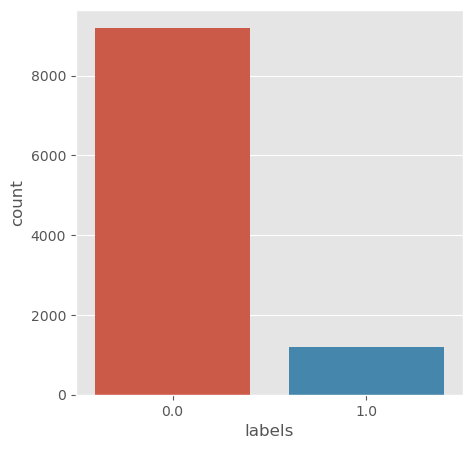

In [196]:

fig = plt.figure(figsize=(5,5))
sns.countplot(x='labels', data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

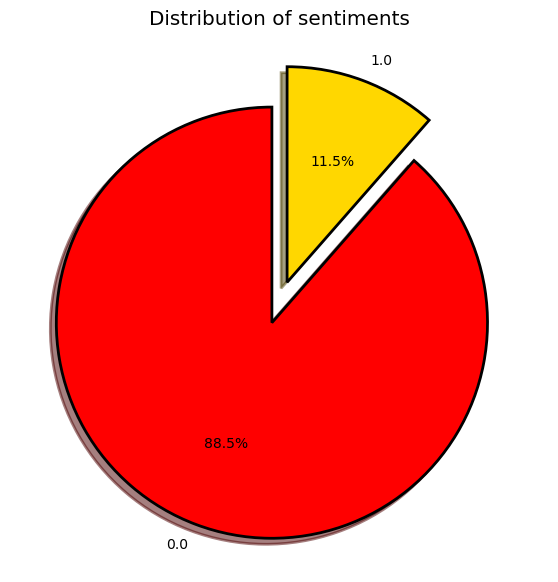

In [197]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['labels'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [201]:

non_hate_Content = df[df.labels == 0]
non_hate_Content.head()

,Content,labels
0,march 13th 2014 booklet downloaded 18300 times...,0.0
1,thank advance download youtube description box...,0.0
2,order help increase booklets downloads would g...,0.0
3,simply copy paste following text youtube video...,0.0
5,click download 742 mb green banner link,0.0


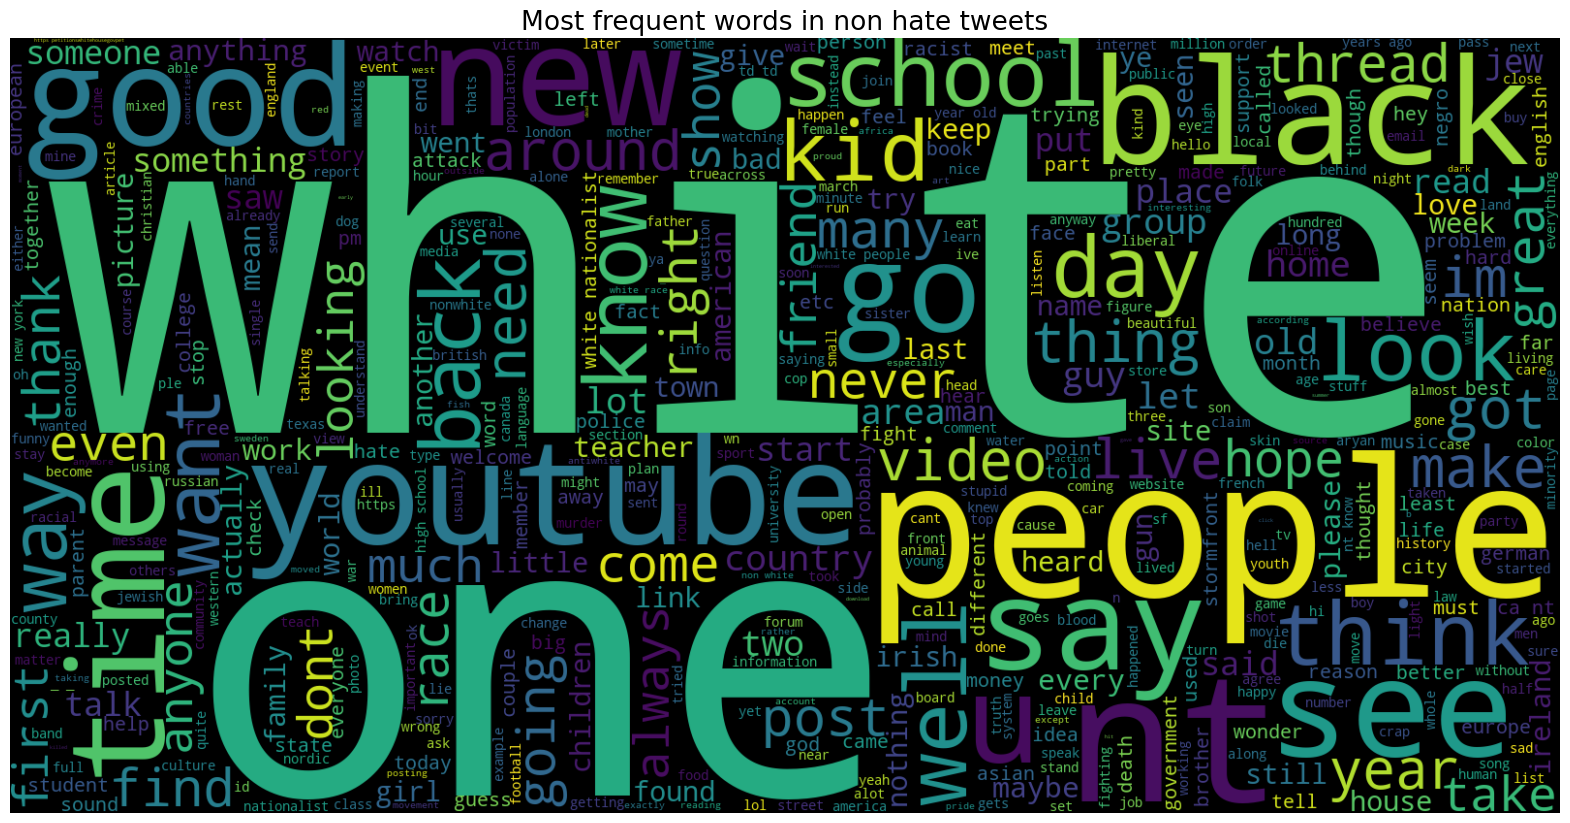

In [202]:
text = ' '.join([word for word in non_hate_Content['Content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [204]:
neg_Content = df[df.labels == 1]
neg_Content.head()

,Content,labels
4,click free download colorfully illustrated 132...,1.0
19,may may jew certainly stupid seems think black...,1.0
21,god knows would come africa blacks could come ...,1.0
24,im insulted stupid jews think see see reading ...,1.0
30,surprise jews promote faggotry,1.0


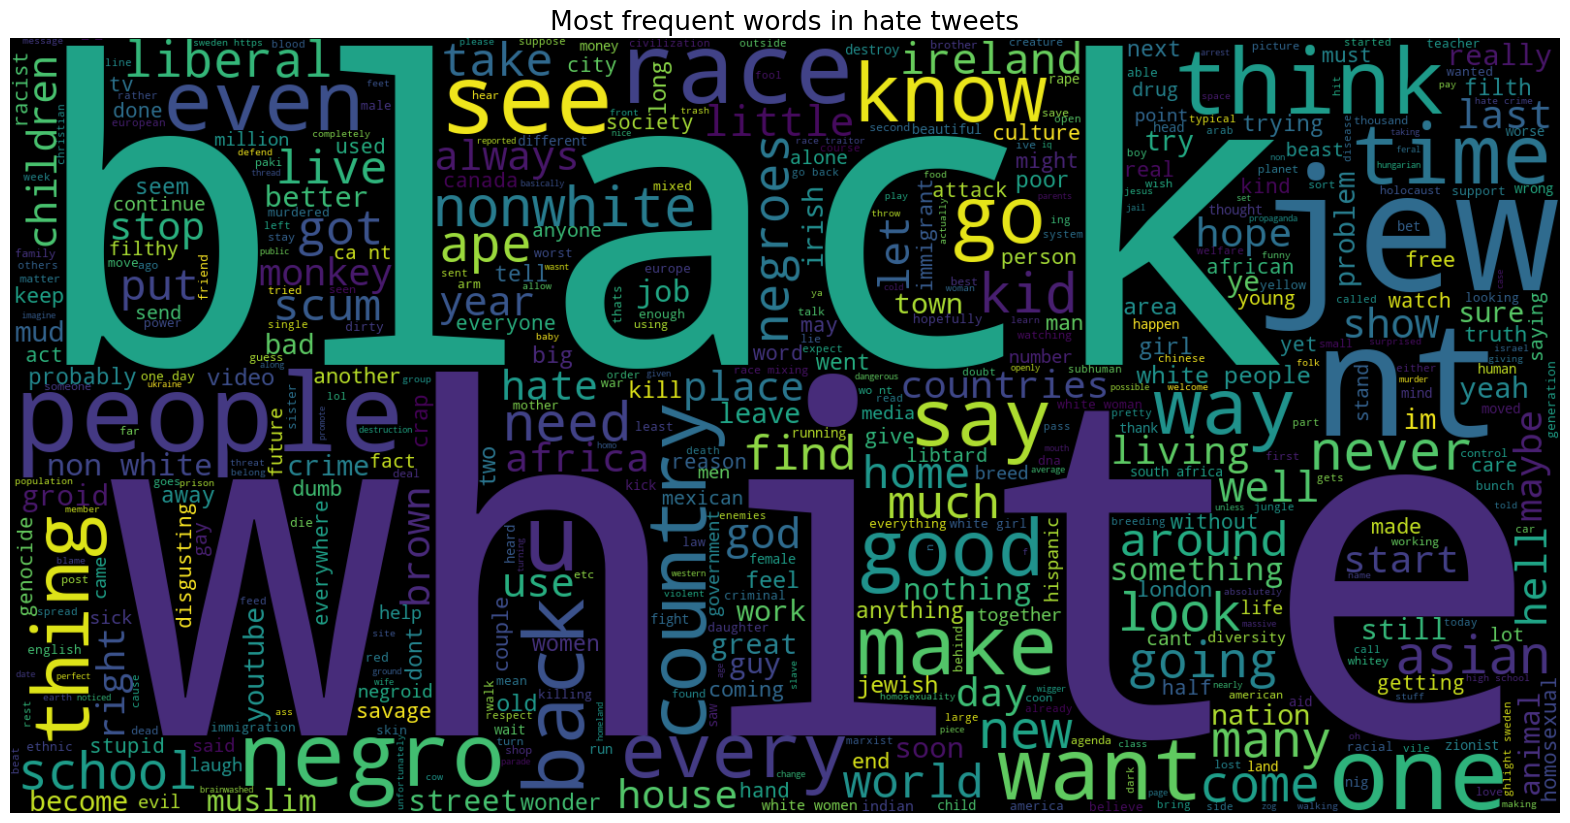

In [205]:
text = ' '.join([word for word in neg_Content['Content']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [214]:
nan_count = df.isna().sum().sum()
print("Count of NaN values:", nan_count)

Count of NaN values: 219


In [215]:
df.dropna(inplace=True)

In [216]:

vect = TfidfVectorizer(ngram_range=(1,2)).fit(df['Content'])

In [217]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 84533

First 20 features: 
['00' '00 32' '00 48' '00 50' '00 anyone' '00 area' '00 bucks' '00 link'
 '000' '000 000' '000 97' '000 buck' '000 buckshot45lc' '000 euro'
 '000 standard' '000 vs' '0003' '001' '001 misdemeanor' '001 read']


In [218]:
X = df['Content']
Y = df['labels']
X = vect.transform(X)

In [219]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [220]:

print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (8306, 84533)
Size of y_train: (8306,)
Size of x_test:  (2077, 84533)
Size of y_test:  (2077,)


In [221]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 88.30%


In [222]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[1834    2]
 [ 241    0]]


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      1836
         1.0       0.00      0.00      0.00       241

    accuracy                           0.88      2077
   macro avg       0.44      0.50      0.47      2077
weighted avg       0.78      0.88      0.83      2077



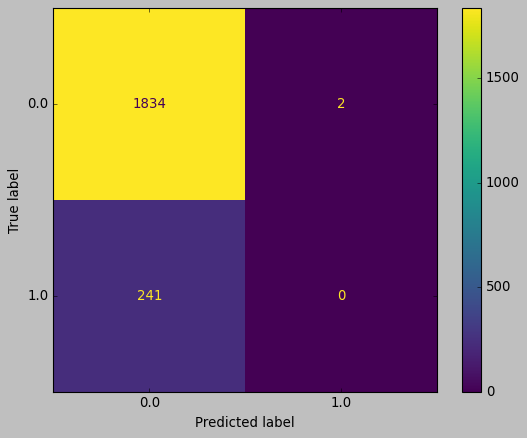

In [224]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [225]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [226]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.89
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [227]:

y_pred = grid.predict(x_test)

In [228]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.93%


In [229]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1825   11]
 [ 219   22]]


              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1836
         1.0       0.67      0.09      0.16       241

    accuracy                           0.89      2077
   macro avg       0.78      0.54      0.55      2077
weighted avg       0.87      0.89      0.85      2077

